# Classifying handwritten digits using artificial neural networks

In [ ]:
# pip install tensorflow

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import models, datasets, layers, optimizers

In [2]:
# https://keras.io/api/datasets/

(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [6]:
X_train.shape

(50000, 28, 28)

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


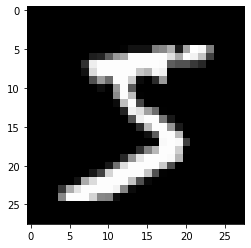

In [9]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

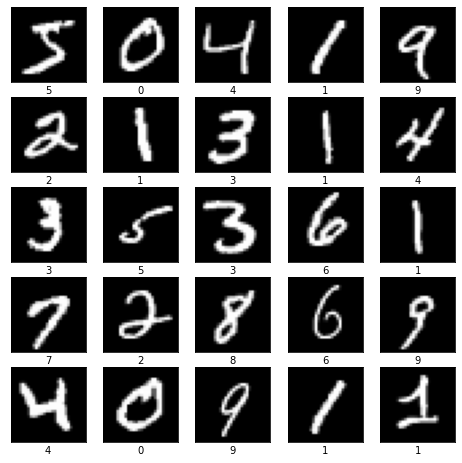

In [10]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

In [11]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [12]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5119 - accuracy: 0.8651
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3168 - accuracy: 0.9112
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2926 - accuracy: 0.9183
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2809 - accuracy: 0.9213
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2739 - accuracy: 0.9237


In [17]:
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9250 - val_loss: 0.2563 - val_accuracy: 0.9305
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2640 - accuracy: 0.9263 - val_loss: 0.2545 - val_accuracy: 0.9306
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2609 - accuracy: 0.9273 - val_loss: 0.2569 - val_accuracy: 0.9300
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2578 - accuracy: 0.9286 - val_loss: 0.2539 - val_accuracy: 0.9319
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9292 - val_loss: 0.2520 - val_accuracy: 0.9324
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2534 - accuracy: 0.9291 - val_loss: 0.2558 - val_accuracy: 0.9301
Epoch 7/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.2520 - accuracy: 0.9297 - val_loss: 0.2531 - val_accuracy:

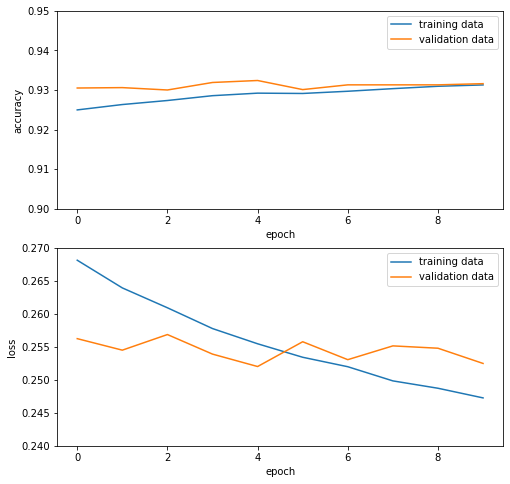

In [18]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.9,0.95])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.24,0.27])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [19]:
ann1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.9272


[0.26360055804252625, 0.9272000193595886]

In [20]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 [==============================] - 0s 990us/step


array([7.5230496e-08, 3.0423163e-13, 7.0289281e-07, 5.1263664e-03,
       1.6551317e-07, 1.3174133e-05, 6.6934950e-13, 9.9462503e-01,
       7.1176896e-06, 2.2742127e-04], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

7


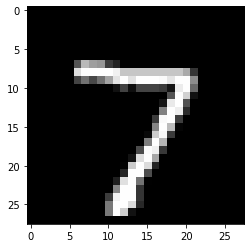

In [22]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [24]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[ 953,    0,    2,    3,    0,    7,   11,    2,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    9,  935,   19,    8,    4,   12,    9,   30,    3],
       [   1,    0,   17,  932,    0,   21,    2,   12,   20,    5],
       [   1,    1,    6,    2,  908,    0,   12,    8,   10,   34],
       [   8,    2,    3,   39,    7,  769,   15,   10,   32,    7],
       [   9,    3,    9,    1,    6,   14,  913,    1,    2,    0],
       [   1,    6,   21,    8,    4,    1,    0,  958,    2,   27],
       [   4,    9,    8,   24,    8,   22,   11,   12,  869,    7],
       [   9,    6,    1,   13,   23,    5,    0,   27,    7,  918]],
      dtype=int64)

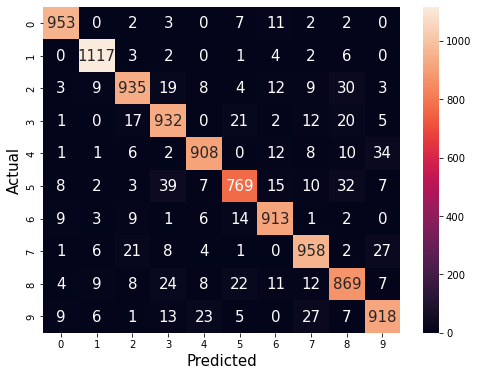

In [25]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.91      0.92      1032
           3       0.89      0.92      0.91      1010
           4       0.94      0.92      0.93       982
           5       0.91      0.86      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.93      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [27]:
# Use one hidden layer

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.9197
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1268 - accuracy: 0.9625
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0869 - accuracy: 0.9740
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 5/5
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0517 - accuracy: 0.9844


In [28]:
ann2.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9755


[0.08331380039453506, 0.9754999876022339]

In [29]:
ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Use dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3051 - accuracy: 0.9095
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1691 - accuracy: 0.9498
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1356 - accuracy: 0.9587
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1161 - accuracy: 0.9641
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1031 - accuracy: 0.9676


In [31]:
ann3.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9749


[0.09055940061807632, 0.9749000072479248]

In [32]:
ann3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
______________________________________________